In [86]:
import re 
import pandas as pd
import numpy as np 
from BetaPose import utils
unit_map = {
  'mM': 1e6, 
  'uM': 1e3, 
  'nM': 1, 
  'pM': 1e-3, 
  'fM': 1e-6
}

# Reference: 
# Marchand, Jean-Rémy, et al. "An ABSINTH-Based Protocol for Predicting Binding Affinities between Proteins and Small Molecules." Journal of Chemical Information and Modeling 60.10 (2020): 5188-5202.
# 754 entries
abs_sel = ['1a4k','1a4w','1a69','1a8i','1a99','1aaq','1adl','1ai4','1ai5','1ai7','1aid','1ajn','1ajp','1ajq','1ajv','1ajx','1apw','1ax0','1axz','1b05','1b0h','1b1h','1b40','1b46','1b6h','1b6k','1b7h','1b9j','1bcu','1bdq','1bgq','1bhx','1bju','1bjv','1bq4','1br6','1bv7','1bv9','1bwa','1c3x','1c5n','1c5o','1c5p','1c5q','1c5s','1c5t','1c5x','1c5y','1c5z','1c70','1c83','1c84','1c86','1c87','1c88','1ce5','1cea','1ceb','1d4h','1d4i','1d4k','1d4l','1d6v','1d7i','1d7j','1db1','1df8','1dfo','1dhi','1dhj','1dmp','1drk','1dzk','1e1v','1e1x','1e2k','1e2l','1e3v','1e6s','1eb2','1ebw','1eby','1ebz','1ec0','1ec1','1ecv','1efy','1ejn','1ela','1eld','1ele','1enu','1epo','1erb','1ezq','1f0r','1f0u','1f4e','1f4g','1f4x','1fcx','1fcy','1fcz','1fd0','1fh7','1fh8','1fh9','1fhd','1fj4','1fkg','1fkh','1fki','1fl3','1fpc','1g2k','1g2l','1g30','1g32','1g35','1g36','1g74','1g7g','1g85','1gcz','1ghv','1ghw','1ghz','1gi1','1gi7','1gj6','1gja','1gni','1gpn','1gu1','1gyx','1gyy','1gzc','1h1p','1h1s','1h22','1h23','1h9z','1ha2','1hbv','1hmr','1hms','1hmt','1hps','1hpv','1hpx','1hsh','1hvh','1hvi','1hvj','1hvk','1hvl','1hvr','1hvs','1hwr','1hxb','1hxw','1i00','1i5r','1igj','1ii5','1izh','1izi','1j14','1j16','1j17','1j4r','1jak','1jet','1jgl','1jqy','1jsv','1jwt','1jys','1jzs','1k1i','1k1j','1k1l','1k1m','1k1n','1k21','1k22','1k4g','1k4h','1kdk','1kv1','1kyv','1kzk','1kzn','1l2s','1l83','1laf','1lag','1lah','1lbk','1lee','1lf2','1lgw','1li2','1li3','1li6','1lke','1lnm','1lpg','1lpk','1lpz','1lst','1m2q','1m2r','1m48','1mes','1met','1mfi','1mq5','1mq6','1mrw','1mrx','1msm','1msn','1mtr','1mu6','1mu8','1n1m','1n1t','1n2v','1n46','1n4h','1n7m','1n8v','1nc1','1nc3','1nf8','1nfu','1nfw','1nfy','1nhu','1nl9','1nli','1nny','1no6','1nq7','1nt1','1nvq','1nvr','1nvs','1nw7','1nz7','1o2o','1o2q','1o2s','1o2w','1o2x','1o2z','1o30','1o33','1o36','1o3d','1o3i','1o3j','1o3k','1o3p','1o5a','1o5b','1o5c','1o5e','1o5g','1oba','1ocq','1od8','1odi','1odj','1ogd','1ogz','1ohr','1ony','1onz','1os5','1oss','1owe','1owh','1oyq','1oyt','1p1n','1p1o','1p1q','1p57','1pb8','1pb9','1pbq','1pot','1ppc','1pph','1pr1','1pxn','1pxp','1pzi','1q63','1q65','1q66','1q72','1q8t','1qan','1qaw','1qb1','1qbn','1qbo','1qbr','1qbs','1qbu','1qbv','1qi0','1qiw','1qy1','1qy2','1r0p','1r4w','1r5y','1r6n','1r9l','1rd4','1rpj','1s38','1sbg','1sdt','1sdu','1sdv','1sgu','1sh9','1siv','1sqo','1sr7','1srg','1ssq','1stc','1sv3','1sw2','1swg','1swr','1syh','1syi','1t4v','1t7j','1ta2','1ta6','1tcw','1tcx','1td7','1tng','1tnh','1tni','1tog','1toi','1toj','1tok','1tom','1u1w','1ugw','1ugx','1uou','1upf','1urg','1usi','1usk','1utj','1utl','1utm','1utn','1uv6','1uvt','1uw6','1uwf','1uz4','1v0k','1v0l','1v1j','1v2j','1v2k','1v2l','1v2n','1v2o','1v2q','1v2r','1v2s','1v2t','1v2u','1v2w','1vfn','1vj9','1vja','1vyf','1vyg','1vyq','1vzq','1w0z','1w11','1w13','1w3j','1w3k','1w5v','1w5w','1w5x','1w5y','1wcq','1wdn','1we2','1wht','1wm1','1ws4','1ws5','1x8j','1x9d','1xap','1xff','1xgi','1xgj','1xhy','1xk9','1xka','1xkk','1xow','1xt8','1y1z','1y20','1y3n','1y6q','1y6r','1yc1','1yc4','1ydk','1ydr','1yds','1ydt','1yqj','1z1r','1z6e','1zgi','1zhy','1zoe','1zog','1zp8','220l','2a4m','2a8g','2aac','2aj8','2aqu','2avo','2avs','2avv','2ayr','2azr','2b07','2b1v','2b4l','2bak','2bal','2boh','2bok','2bpv','2bpy','2bq7','2bqv','2br1','2brb','2brm','2bt9','2bvd','2bvr','2bvs','2byr','2bys','2bz6','2bza','2c1p','2c3l','2cbu','2cej','2cen','2cgf','2cht','2cji','2csn','2d0k','2d3u','2d3z','2drc','2dri','2e2r','2e7f','2epn','2exm','2f1g','2f2h','2f34','2f35','2f5t','2f80','2f81','2f8g','2fgu','2fgv','2flr','2fpz','2fqw','2fqx','2fr3','2fw6','2fwp','2fx6','2fxu','2g79','2g8r','2g94','2gl0','2glp','2gss','2gst','2gv6','2gv7','2h4g','2h4k','2h6b','2ha2','2ha3','2ha5','2ha6','2hb1','2hb3','2hhn','2hjb','2hs1','2hs2','2hxm','2i0a','2i2b','2i4j','2i4u','2i4v','2i80','2idw','2ien','2ieo','2ihq','2iko','2il2','2iuz','2iwx','2izl','2j2u','2j34','2j47','2j4g','2j4i','2j77','2j7e','2j7g','2j7h','2j9n','2jds','2jfz','2jh0','2jh5','2jh6','2jiw','2nmy','2nmz','2nnk','2nnp','2nt7','2nta','2o0u','2o2u','2o4j','2o4k','2o4r','2o4s','2oag','2ogy','2ojg','2ojj','2ok1','2on6','2oxd','2oxx','2oxy','2oyk','2oym','2p16','2p4j','2p4y','2p7a','2p7z','2p95','2pcp','2pgz','2pk5','2pk6','2pql','2pqz','2psu','2psv','2pu2','2pvh','2pvj','2pvk','2pvl','2pwc','2pwd','2pwg','2pwr','2pyn','2q54','2q55','2q5k','2q63','2q64','2q88','2q89','2qbq','2qbr','2qbs','2qbu','2qci','2qd6','2qd7','2qd8','2qe4','2qfo','2qg0','2qg2','2qhm','2qhy','2qhz','2qi0','2qi1','2qi3','2qi4','2qi5','2qi6','2qi7','2qm9','2qmg','2qnn','2qnq','2qrl','2qt5','2qtg','2qu6','2r2m','2r2w','2r38','2r3t','2r3w','2r43','2r5a','2r5p','2r6w','2r6y','2ra0','2rcb','2ri9','2rkf','2rkg','2sim','2std','2tpi','2uwo','2uxz','2uy0','2v00','2v3u','2v95','2vh6','2vkm','2vnt','2vw5','2vyt','2z4b','2zb0','2zb1','3aid','3b4p','3b50','3b5r','3b65','3b66','3b67','3b68','3b7j','3be9','3bex','3bfu','3bgb','3bgc','3bgq','3bgz','3bra','3brn','3bu1','3buf','3bug','3buh','3bvb','3c2u','3cct','3ccw','3ccz','3cd0','3cd5','3cd7','3cda','3cdb','3cf8','3cj2','3cj4','3cj5','3ckp','3cs7','3cyw','3cyx','3d0b','3d1x','3d1y','3d1z','3d20','3d7z','3d83','3d94','3djk','3e5a','3e5u','3e64','3e92','3e93','3ebl','3eko','3ekr','3eqr','3f8c','3f8f','3gss','3gst','3jdw','3kiv','4ts1','5er1','5std','5yas','6std','7std']
abs_sel = [i.upper() for i in abs_sel]


PB_setfile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_refined_set.2020"
basepath = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/"

# Pre-process the PDBBind-refined dataset (CSV)
with open(PB_setfile, "r") as file1: 
  lines = [i.strip() for i in file1.read().split("\n")]
  lines = [i for i in lines if len(i)>0 and i[0]!="#"]
  lines = [re.sub(r"//.*", "", i).strip() for i in lines]
  table = [i.split() for i in lines]

aff_values = [i[3] for i in table]
units = []; 
table_f = []; 
for i,j in zip(aff_values, table):
  value = i.split("=")[1]
  valtype = i.split("=")[0]
  digs = float(re.sub(r"[a-z]M","",value)); 
  unit = re.sub(r"[0-9.]","",value); 
  factor = unit_map[unit]; 
  
  # Calculate the Embedding Factor of ligand and generate the list
  if j[0].upper() in abs_sel: 
    pdbcode = j[0]
    embfactor = utils.EmbeddingFactor(basepath, pdbcode)
    
    complex_nha = PDBnha(f"{basepath}/{pdbcode}/{pdbcode}_complex.pdb"); 
    lig_nha = LIGnha(f"{basepath}/{pdbcode}/{pdbcode}_complex.pdb")
    table_f.append([j[0].upper(), valtype, round(digs*factor, 3), embfactor, complex_nha, lig_nha])
    # print(f"{value}: {round(digs*factor, 3)} nM")
  
  # find intersection with the ABS selection
  if unit not in units: 
    units.append(unit)

pd_table = pd.DataFrame(table_f, columns=["PDB", "affinity_type", "affinity","embedding_factor", "complex_nha", "lig_nha"])
pd_table = pd_table.sort_values("affinity", ignore_index=True)
# state = (pd_table["affinity"] < 50).to_numpy()

with open("/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/abs_sel.csv", 'w') as file1: 
  file1.write(pd_table.to_csv())

Surface contribution: -9.7328; Surface pure: 395.861
Surface contribution: 20.8037; Surface pure: 323.331
Surface contribution: 227.2591; Surface pure: 721.133
Surface contribution: 252.2132; Surface pure: 586.774
Surface contribution: 20.9507; Surface pure: 209.619
Surface contribution: 131.3946; Surface pure: 679.271
Surface contribution: 133.8049; Surface pure: 678.572
Surface contribution: 157.6825; Surface pure: 581.536
Surface contribution: -31.1653; Surface pure: 329.18
Surface contribution: 168.3741; Surface pure: 576.362
Surface contribution: 153.0925; Surface pure: 578.063
Surface contribution: 179.5217; Surface pure: 582.0
Surface contribution: -10.0007; Surface pure: 393.903
Surface contribution: 39.0233; Surface pure: 554.636
Surface contribution: 46.0124; Surface pure: 317.641
Surface contribution: 20.8479; Surface pure: 342.907
Surface contribution: 76.6351; Surface pure: 425.399
Surface contribution: 13.1647; Surface pure: 239.635
Surface contribution: 231.9836; Surface

[16:32:45] 1bq4_ligand: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


Surface contribution: 154.4393; Surface pure: 479.156
Surface contribution: 80.8293; Surface pure: 521.007
Surface contribution: -4.6409; Surface pure: 362.663
Surface contribution: -25.9805; Surface pure: 278.613
Surface contribution: 29.2581; Surface pure: 673.62
Surface contribution: 73.4666; Surface pure: 415.679
Surface contribution: 55.6032; Surface pure: 328.942
Surface contribution: 56.8772; Surface pure: 304.011
Surface contribution: -2.5048; Surface pure: 376.475
Surface contribution: 40.7516; Surface pure: 240.601
Surface contribution: 9.7576; Surface pure: 605.641
Surface contribution: 14.2168; Surface pure: 697.475
Surface contribution: -22.0312; Surface pure: 316.24
Surface contribution: 3.7536; Surface pure: 389.331
Surface contribution: -6.0641; Surface pure: 229.09
Surface contribution: 11.2617; Surface pure: 242.704
Surface contribution: 118.6436; Surface pure: 591.585
Surface contribution: -10.0538; Surface pure: 392.803
Surface contribution: -11.3823; Surface pure: 

Surface contribution: 10.8707; Surface pure: 448.153
Surface contribution: -10.1774; Surface pure: 198.37
Surface contribution: 6.3309; Surface pure: 222.922
Surface contribution: 12.749; Surface pure: 471.537
Surface contribution: 45.3393; Surface pure: 718.676
Surface contribution: 50.689; Surface pure: 699.391
Surface contribution: -0.9535; Surface pure: 327.105
Surface contribution: 140.1561; Surface pure: 505.452
Surface contribution: 13.2989; Surface pure: 347.568
Surface contribution: 133.9147; Surface pure: 484.594
Surface contribution: 80.4031; Surface pure: 441.975
Surface contribution: -39.718; Surface pure: 483.183
Surface contribution: 69.9748; Surface pure: 483.331
Surface contribution: 89.9242; Surface pure: 380.914
Surface contribution: 105.2899; Surface pure: 431.047
Surface contribution: 340.0959; Surface pure: 954.405
Surface contribution: 59.5228; Surface pure: 612.514
Surface contribution: 241.6526; Surface pure: 578.116
Surface contribution: 90.1625; Surface pure:

Surface contribution: 87.3795; Surface pure: 508.896
Surface contribution: -15.0187; Surface pure: 218.158
Surface contribution: 64.6419; Surface pure: 294.385
Surface contribution: 12.4396; Surface pure: 343.792
Surface contribution: 180.503; Surface pure: 515.613
Surface contribution: 54.2297; Surface pure: 532.959
Surface contribution: 82.0749; Surface pure: 294.466
Surface contribution: -11.8402; Surface pure: 376.545
Surface contribution: 66.6886; Surface pure: 330.813
Surface contribution: 92.4144; Surface pure: 296.376
Surface contribution: 73.9536; Surface pure: 716.86
Surface contribution: 102.42; Surface pure: 478.832
Surface contribution: 84.4499; Surface pure: 444.091
Surface contribution: 72.3537; Surface pure: 429.225
Surface contribution: 77.3131; Surface pure: 768.426
Surface contribution: -5.1449; Surface pure: 335.153
Surface contribution: 45.5172; Surface pure: 372.063
Surface contribution: 1.3913; Surface pure: 269.769
Surface contribution: 44.7807; Surface pure: 33

Surface contribution: 196.7537; Surface pure: 550.803
Surface contribution: 109.7145; Surface pure: 376.177
Surface contribution: 308.2015; Surface pure: 601.895
Surface contribution: 186.8407; Surface pure: 832.807
Surface contribution: 92.7831; Surface pure: 675.47
Surface contribution: 107.9786; Surface pure: 720.242
Surface contribution: 53.755; Surface pure: 680.639
Surface contribution: -5.638; Surface pure: 292.823
Surface contribution: 35.163; Surface pure: 683.015
Surface contribution: 35.5966; Surface pure: 628.112
Surface contribution: 71.3438; Surface pure: 596.746
Surface contribution: 4.3348; Surface pure: 344.497
Surface contribution: 148.5375; Surface pure: 701.881
Surface contribution: 89.3656; Surface pure: 328.946
Surface contribution: 61.684; Surface pure: 685.316
Surface contribution: 7.482; Surface pure: 244.375
Surface contribution: 102.4852; Surface pure: 294.172
Surface contribution: 187.4288; Surface pure: 814.915
Surface contribution: 67.236; Surface pure: 74

In [61]:
a="abc // def"
x = re.search(f"//.*", a).group()
print(dir(x))
print(x)
# print(x.group())

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']
// def


[ 39 184 259 ... 561 604 627]
['1IGJ', '1A4K', '2GV6', '1OS5', '1O30', '3F8F', '3CJ5', '1O2Z', '1O36', '1UGX', '1O2W', '3B7J', '2GSS', '1V2O', '1V2T', '1V2W', '1V2R'] 17
[20 39 45 ...  7 12 11]
Mean: 27.40868263473054, Std: 12.672960845355044 ; Threshold 15


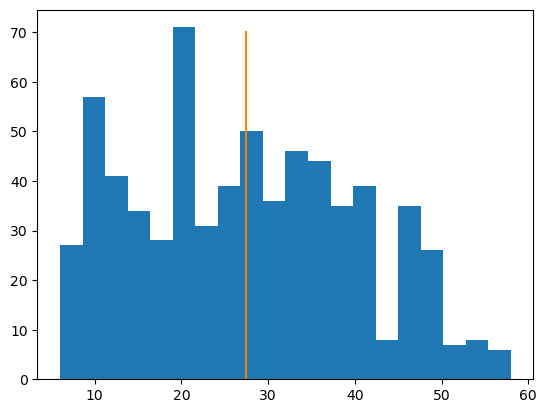

In [85]:
import matplotlib.pyplot as plt 
# plt.plot(np.log(pd_table["affinity"].to_numpy()[:500]), pd_table["embedding_factor"].to_numpy()[:500])

col_pdb = pd_table["PDB"].to_numpy()
small_embs = col_pdb[np.nonzero(pd_table["embedding_factor"].to_numpy() < 0.6)[0]]
small_embs = [i for i in small_embs]

# Some values with very low embedding factor 
print(np.nonzero(pd_table["embedding_factor"].to_numpy() < 0.6)[0])
print(small_embs, len(small_embs))

nhas = pd_table["lig_nha"].to_numpy()
print(nhas)
print(f"Mean: {nhas.mean()}, Std: {nhas.std()} ; Threshold {round(nhas.mean() - nhas.std())}")
bins,_,_ = plt.hist(nhas[nhas<8000], bins=20)
maxbin = int(max(bins))
plt.plot([27.4]*maxbin, range(maxbin))

30
100 100


(array([ 6.,  5.,  9., 18., 16., 13., 15.,  9.,  5.,  4.]),
 array([-6.2146081 , -4.25314778, -2.29168746, ...,  9.47707447,
        11.43853479, 13.39999511]),
 <BarContainer object of 10 artists>)

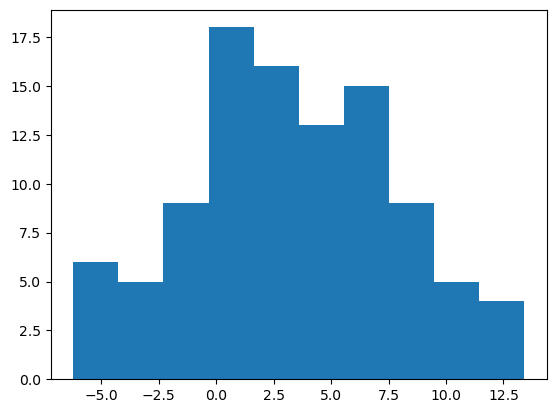

In [97]:
# 60 PDB code from the top 50 % 
  # 30 PDB top 100 and Embed > 85 and nha < 6033
  # 30 PDB top 330 and Embed > 65 and nha < 6033
  
# 40 PDB code from the tail 50 % Embed > 50 %
  # 40 PDB tail 337 and nha < 6033

nha_threshold = 6033
  
final_lst = []
data = pd_table.to_numpy()
# lines = np.random.choice([i for i in data[:100]],30, axis=1)

state_1 = (pd_table["affinity"].to_numpy()<=1.7) * (pd_table["embedding_factor"].to_numpy()>0.85) * (pd_table["complex_nha"].to_numpy()<=nha_threshold) * (pd_table["lig_nha"].to_numpy()>10)
state_1 = np.nonzero(state_1)[0]
state_1 = np.random.choice(state_1, 30, replace=False)
state_1.sort()
print(len(state_1))


for idx in state_1:
  final_lst.append([i for i in pd_table.loc[idx]])
  
state_2 = (pd_table["affinity"].to_numpy()>1.7) * (pd_table["affinity"].to_numpy()<=110) * (pd_table["embedding_factor"].to_numpy()>0.65) * (pd_table["complex_nha"].to_numpy()<=nha_threshold) * (pd_table["lig_nha"].to_numpy()>10)
state_2 = np.nonzero(state_2)[0]
state_2 = np.random.choice(state_2, 30, replace=False)
state_2.sort()
for idx in state_2:
  final_lst.append([i for i in pd_table.loc[idx]])
# print(final_lst, len(final_lst))

state_3 = (pd_table["affinity"].to_numpy()>110) * (pd_table["embedding_factor"].to_numpy()>0.5) * (pd_table["complex_nha"].to_numpy()<=nha_threshold) * (pd_table["lig_nha"].to_numpy()>10)
state_3 = np.nonzero(state_3)[0]
state_3 = np.random.choice(state_3, 40, replace=False)
state_3.sort()
for idx in state_3:
  final_lst.append([i for i in pd_table.loc[idx]])
# print(final_lst, len(final_lst))

x = [i[0] for i in final_lst]
# print(x)
print(len(x), len(set(x)))

rand100 = pd.DataFrame(final_lst, columns=pd_table.columns)

with open("/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/ABS_RandomSelect.csv", "w") as file1:
  file1.write(rand100.to_csv())

#   print(idx, line)
plt.hist(np.log(rand100['affinity'].to_numpy()))

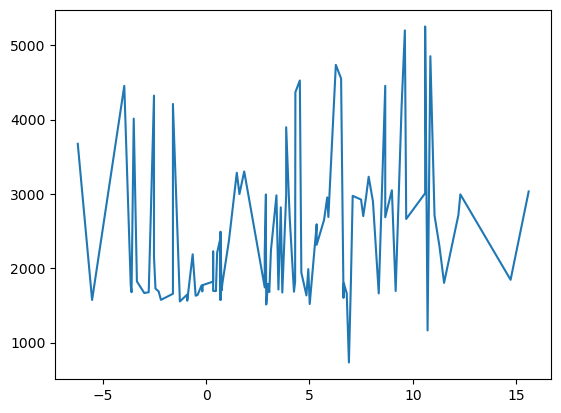

In [92]:
plt.plot(np.log(rand100["affinity"].to_numpy()), rand100["complex_nha"].to_numpy())

In [131]:
csvfile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/ABS_RandomSelect.csv"

table = pd.read_csv(csvfile, index_col=0)
table
for i,row in table.iterrows(): 
#   f"/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/{pdbcode}/{pdbcode}_ligand.sdf"
  print(row[0].lower(), end=" ")

2i4u 1hvj 1hpx 2i4v 1hvk 1hvi 2pk6 2pk5 3djk 1msm 1kzk 1c70 1sr7 1sdu 2std 1dmp 2bys 1hvr 1ebz 2ayr 1xow 1sdt 2fgu 1msn 1kdk 2p4y 1ec1 2idw 1w5w 1d4l 1xap 2f8g 1i5r 2uxz 1mtr 3d83 2v95 1tom 3e5a 1h1s 1efy 2pvj 1vyg 1ajx 1laf 1b6h 1sbg 1mes 2avs 3b50 2f1g 1zoe 1swg 1fcx 1pxn 1zog 2qnn 2fqx 1lpg 1fpc 1q72 1uwf 1drk 1fhd 2on6 1g7g 2p7z 1dhj 1g74 2zb1 1lag 1dzk 1sh9 1nl9 1kyv 1o2w 1p1o 3bex 1syi 1pb8 1qaw 1nw7 1enu 2d0k 1e2k 4ts1 2brb 2pwg 1q8t 1upf 2pwd 1ghv 1c87 1lgw 2fpz 1pb9 1v2r 1f4e 2vyt 2aac 

In [42]:
import pytraj as pt
import numpy as np 

a = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/1hvj/1hvj_complex.pdb"
def PDBnha(pdbfile):
  traj = pt.load(pdbfile, top=pdbfile)
  atomic_numbers = np.array([i.atomic_number for i in traj.top.atoms])
  nha = np.count_nonzero(atomic_numbers > 1)
  return nha
def PDBnh(pdbfile):
  traj = pt.load(pdbfile, top=pdbfile)
  atomic_numbers = np.array([i.atomic_number for i in traj.top.atoms])
  nh = np.count_nonzero(atomic_numbers == 1)
  return nh
ratios=[]
for i in pd_table.to_numpy():
  pdb = i[0].lower()
  pdbfile = f"/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/{pdb}/{pdb}_complex.pdb"
  nha = PDBnha(pdbfile); 
  nh  = PDBnh(pdbfile); 
  ratios.append(nha/nh); 
  print(f"{nha}, {nh}, ratio: {nha/nh}")
print(np.mean(ratios)) 
# Average ration of nha and hydrogen number: 1.109888041096362

3674, 3456, ratio: 1.0630787037037037
1731, 1614, ratio: 1.0724907063197027
1712, 1556, ratio: 1.1002570694087404
1574, 1606, ratio: 0.9800747198007472
1639, 1540, ratio: 1.0642857142857143
1568, 1606, ratio: 0.9763387297633873
1756, 1616, ratio: 1.0866336633663367
1728, 1606, ratio: 1.0759651307596514
2421, 2144, ratio: 1.1291977611940298
1575, 1606, ratio: 0.9806973848069739
1575, 1606, ratio: 0.9806973848069739
1847, 1616, ratio: 1.1429455445544554
1683, 1556, ratio: 1.0816195372750643
1670, 1608, ratio: 1.0385572139303483
4453, 3918, ratio: 1.1365492598264422
1809, 1616, ratio: 1.119430693069307
2395, 2173, ratio: 1.102162908421537
1762, 1616, ratio: 1.0903465346534653
1566, 1602, ratio: 0.9775280898876404
1678, 1556, ratio: 1.0784061696658098
1763, 1612, ratio: 1.0936724565756824
4013, 3874, ratio: 1.0358802271553949
4374, 3918, ratio: 1.116385911179173
1702, 1616, ratio: 1.0532178217821782
1823, 1616, ratio: 1.1280940594059405
1684, 1565, ratio: 1.076038338658147
1772, 1588, rati

2923, 2708, ratio: 1.079394387001477
3007, 2708, ratio: 1.1104135893648448
1687, 1538, ratio: 1.0968790637191157
2116, 1807, ratio: 1.1710016602102933
12836, 12438, ratio: 1.031998713619553
12955, 12403, ratio: 1.044505361606063
1695, 1602, ratio: 1.0580524344569289
1873, 1612, ratio: 1.161910669975186
12719, 12416, ratio: 1.024403994845361
2989, 2196, ratio: 1.3611111111111112
1782, 1588, ratio: 1.1221662468513853
2113, 1807, ratio: 1.1693414499169894
2931, 2423, ratio: 1.2096574494428394
1907, 1631, ratio: 1.1692213366033108
1870, 1705, ratio: 1.096774193548387
1966, 1776, ratio: 1.106981981981982
2981, 2525, ratio: 1.1805940594059405
1331, 1177, ratio: 1.1308411214953271
2015, 1603, ratio: 1.2570180910792264
1714, 1556, ratio: 1.101542416452442
2053, 1877, ratio: 1.0937666489078317
2685, 2219, ratio: 1.2100045065344749
1649, 1562, ratio: 1.055697823303457
2727, 2375, ratio: 1.1482105263157896
2819, 2696, ratio: 1.0456231454005935
1674, 1606, ratio: 1.0423412204234122
5947, 5384, rat

4938, 4162, ratio: 1.1864488226814032
1690, 1593, ratio: 1.0608913998744507
1807, 1588, ratio: 1.1379093198992443
3305, 2844, ratio: 1.1620956399437412
3665, 3264, ratio: 1.1228553921568627
2043, 1919, ratio: 1.064616988014591
1238, 1049, ratio: 1.1801715919923736
4375, 3880, ratio: 1.1275773195876289
9571, 8005, ratio: 1.195627732667083
1783, 1588, ratio: 1.1227959697732997
2924, 2643, ratio: 1.106318577374196
1492, 1216, ratio: 1.2269736842105263
4412, 3254, ratio: 1.3558696988322065
5658, 5288, ratio: 1.0699697428139183
2702, 2367, ratio: 1.1415293620616815
39425, 35508, ratio: 1.1103131688633547
12856, 11320, ratio: 1.1356890459363957
4080, 3441, ratio: 1.185701830863121
1732, 1595, ratio: 1.0858934169278998
4656, 4347, ratio: 1.0710835058661146
2965, 2750, ratio: 1.0781818181818181
2138, 1893, ratio: 1.1294241944004226
6703, 6216, ratio: 1.0783462033462032
3231, 3026, ratio: 1.067746199603437
2713, 2544, ratio: 1.066430817610063
4458, 3878, ratio: 1.149561629706034
4407, 3729, rat

In [70]:
def LIGnha(pdbfile, mask=":LIG"):
  traj = pt.load(pdbfile, top=pdbfile, mask=mask)
  atomic_numbers = np.array([i.atomic_number for i in traj.top.atoms])
  nha = np.count_nonzero(atomic_numbers > 1)
  return nha

LIGnha(pdbfile)
lignhas = []
for i in pd_table.to_numpy():
  pdb = i[0].lower()
  pdbfile = f"/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/{pdb}/{pdb}_complex.pdb"
  lignha = LIGnha(pdbfile)
  lignhas.append(lignha)
  print(f"Ligand NHA: {lignha}")
  
  
print(f"Average {np.mean(lignhas)}")

Ligand NHA: 20
Ligand NHA: 39
Ligand NHA: 45
Ligand NHA: 57
Ligand NHA: 46
Ligand NHA: 46
Ligand NHA: 39
Ligand NHA: 39
Ligand NHA: 36
Ligand NHA: 58
Ligand NHA: 58
Ligand NHA: 54
Ligand NHA: 40
Ligand NHA: 50
Ligand NHA: 20
Ligand NHA: 56
Ligand NHA: 37
Ligand NHA: 38
Ligand NHA: 54
Ligand NHA: 38
Ligand NHA: 38
Ligand NHA: 27
Ligand NHA: 28
Ligand NHA: 41
Ligand NHA: 51
Ligand NHA: 39
Ligand NHA: 41
Ligand NHA: 54
Ligand NHA: 48
Ligand NHA: 58
Ligand NHA: 43
Ligand NHA: 37
Ligand NHA: 37
Ligand NHA: 20
Ligand NHA: 35
Ligand NHA: 34
Ligand NHA: 30
Ligand NHA: 45
Ligand NHA: 45
Ligand NHA: 37
Ligand NHA: 54
Ligand NHA: 58
Ligand NHA: 49
Ligand NHA: 33
Ligand NHA: 20
Ligand NHA: 38
Ligand NHA: 35
Ligand NHA: 48
Ligand NHA: 37
Ligand NHA: 16
Ligand NHA: 40
Ligand NHA: 45
Ligand NHA: 25
Ligand NHA: 46
Ligand NHA: 42
Ligand NHA: 45
Ligand NHA: 46
Ligand NHA: 30
Ligand NHA: 42
Ligand NHA: 30
Ligand NHA: 51
Ligand NHA: 37
Ligand NHA: 21
Ligand NHA: 45
Ligand NHA: 25
Ligand NHA: 35
Ligand NHA

Ligand NHA: 13
Ligand NHA: 29
Ligand NHA: 20
Ligand NHA: 19
Ligand NHA: 20
Ligand NHA: 9
Ligand NHA: 8
Ligand NHA: 18
Ligand NHA: 30
Ligand NHA: 30
Ligand NHA: 9
Ligand NHA: 18
Ligand NHA: 13
Ligand NHA: 9
Ligand NHA: 20
Ligand NHA: 9
Ligand NHA: 15
Ligand NHA: 15
Ligand NHA: 19
Ligand NHA: 9
Ligand NHA: 26
Ligand NHA: 33
Ligand NHA: 19
Ligand NHA: 26
Ligand NHA: 25
Ligand NHA: 18
Ligand NHA: 19
Ligand NHA: 11
Ligand NHA: 10
Ligand NHA: 20
Ligand NHA: 11
Ligand NHA: 19
Ligand NHA: 28
Ligand NHA: 20
Ligand NHA: 16
Ligand NHA: 9
Ligand NHA: 21
Ligand NHA: 9
Ligand NHA: 18
Ligand NHA: 8
Ligand NHA: 23
Ligand NHA: 19
Ligand NHA: 19
Ligand NHA: 18
Ligand NHA: 12
Ligand NHA: 9
Ligand NHA: 15
Ligand NHA: 37
Ligand NHA: 20
Ligand NHA: 12
Ligand NHA: 7
Ligand NHA: 7
Ligand NHA: 30
Ligand NHA: 11
Ligand NHA: 10
Ligand NHA: 8
Ligand NHA: 10
Ligand NHA: 9
Ligand NHA: 8
Ligand NHA: 6
Ligand NHA: 14
Ligand NHA: 13
Ligand NHA: 10
Ligand NHA: 15
Ligand NHA: 27
Ligand NHA: 19
Ligand NHA: 12
Ligand NHA:

In [98]:
Too many structures like C4002QI5

C4001N46 Ligand left the pocket 




SyntaxError: invalid syntax (2920258057.py, line 1)

In [112]:
import requests

titles = []
for i in pd_table.to_numpy():
  pdb = i[0].lower()
  response = requests.post(f'http://files.rcsb.org/download/{pdb}.pdb')
  title = " ".join([i.strip("TITLE").strip() for i in response.text.split("\n") if "TITLE" in i])
  titles.append(title)
  print(f"finished {pdb}")
pd_table["title"] = titles
print(pd_table.to_csv())
with open("/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/titles.csv", "w") as file1: 
  file1.write(pd_table.to_csv())

finished 1y6q
finished 2i4u
finished 2i0a
finished 1hvj
finished 2q5k
finished 1hpx
finished 2hb3
finished 2i4v
finished 1mq6
finished 1hvk
finished 1hvi
finished 2pk6
finished 2qi5
finished 1hxw
finished 7std
finished 2pk5
finished 3cs7
finished 3djk
finished 1qbr
finished 2qi6
finished 2f81
finished 1n46
finished 5std
finished 1msm
finished 2o4k
finished 2qi4
finished 1kzk
finished 1bv7
finished 1c70
finished 1hvs
finished 1qbu
finished 2qi7
finished 2qi3
finished 1y6r
finished 1sr7
finished 2p16
finished 2o4j
finished 1sdu
finished 1d4h
finished 1igj
finished 1bv9
finished 1hvl
finished 1hxb
finished 2drc
finished 2std
finished 1z6e
finished 2vh6
finished 1eby
finished 1mrw
finished 1df8
finished 1dmp
finished 2g94
finished 2bys
finished 1hvr
finished 1qbs
finished 1hsh
finished 1ebz
finished 2o4r
finished 1met
finished 2p95
finished 2aqu
finished 2ayr
finished 1xow
finished 1sdt
finished 3b65
finished 1hpv
finished 1d4k
finished 1hps
finished 1fcz
finished 2fgu
finished 2qmg
finish

finished 2tpi
finished 1ajq
finished 1w3k
finished 1v2l
finished 1e2l
finished 1li3
finished 1pzi
finished 1odi
finished 1ghw
finished 1c87
finished 1c5y
finished 1v2s
finished 2exm
finished 2bvs
finished 1odj
finished 1c5t
finished 1ai7
finished 1li2
finished 1v2w
finished 1tni
finished 2qrl
finished 1lgw
finished 2fpz
finished 1j16
finished 1utj
finished 1li6
finished 2hb1
finished 1ai5
finished 2fx6
finished 1wht
finished 2bvr
finished 2a8g
finished 1c3x
finished 3buh
finished 2v00
finished 1gyy
finished 2azr
finished 1pb9
finished 1d7i
finished 3jdw
finished 1nli
finished 1v2r
finished 1jys
finished 1c5o
finished 1utn
finished 2sim
finished 1uz4
finished 1l83
finished 1v2u
finished 1tnh
finished 1d7j
finished 1bcu
finished 5yas
finished 1v2j
finished 1br6
finished 1e6s
finished 2ri9
finished 3bug
finished 1lbk
finished 1ax0
finished 3buf
finished 1y1z
finished 1ogd
finished 2ha3
finished 1utm
finished 2v3u
finished 1ws4
finished 1f4e
finished 1tng
finished 2fw6
finished 3c2u
finish

In [122]:
import nltk
titles = pd_table["title"].to_numpy()

keys = ["protease"]
for i in titles: 
  thetitle = i.lower()
  for j in keys: 
    if j in thetitle:
      print("found")
    else: 
      print("not found key")
      print(i)

not found key
CYRSTAL STRUCTURE OF MTA/ADOHCY NUCLEOSIDASE COMPLEXED WITH 2 MT-DADME-IMMA
found
found
found
found
found
found
found
not found key
CRYSTAL STRUCTURE OF 3-CHLORO-N-[4-CHLORO-2-[[(5-CHLORO-2-PYRIDINYL) 2 AMINO]CARBONYL]-6-METHOXYPHENYL]-4-[[(4,5-DIHYDRO-2-OXAZOLYL) 3 METHYLAMINO]METHYL]-2-THIOPHENECARBOXAMIDE COMPLEXED WITH HUMAN 4 FACTOR XA
found
found
found
found
found
not found key
SCYTALONE DEHYDRATASE PLUS INHIBITOR 4
found
not found key
FACTOR XA IN COMPLEX WITH THE INHIBITOR 1-(4-METHOXYPHENYL)- 2 6-(4-(1-(PYRROLIDIN-1-YLMETHYL)CYCLOPROPYL)PHENYL)-3- 3 (TRIFLUOROMETHYL)-5,6-DIHYDRO-1H-PYRAZOLO[3,4-C]PYRIDIN- 4 7(4H)-ONE
found
found
found
found
not found key
CRYSTAL STRUCTURE OF HUMAN TR BETA LIGAND-BINDING DOMAIN COMPLEXED 2 WITH A POTENT SUBTYPE-SELECTIVE THYROMIMETIC
not found key
SCYTALONE DEHYDRATASE PLUS INHIBITOR 2
found
found
found
found
found
found
found
found
found
found
not found key
CRYSTAL STRUCTURE OF MTA/ADOHCY NUCLEOSIDASE COMPLEXED WITH 2 MT-IMMA.
no